Here we take the catalog of standard stars from SDSS S82. We have for those both the mean photometry catalog, and light curves . 
For random 10% of that catalog Branimir kindly provided CRTS light curves . Based on these I made earlier a summary catalog for these stars : 
    /Users/chris/GradResearch/CRTS_PROJECT/code/A_Fig_1_stars_CRTS_stats.ipynb  - the catalog in 
    /Users/chris/GradResearch/CRTS_PROJECT/data_products/CRTS_SDSS_combined_stars_catalog.dat
    
The SDSS S82 standard stars light curves are available at the UW website,
and the CRTS S82 standard stars light curves live
at /Users/chris/GradResearch/CRTS_PROJECT/raw_LC_CRTS/stars/  

In this notebook I want to : 

* compare the CRTS to SDSS photometry for standard stars 
* make queries using the SDSS ra, dec for the 10% stars chosen by Branimir against the PS1 database, and PTF database. PS1 would give us mean photometry for these stars, while PTF contains both light curves and mean photometry. 

In [1]:
# Necessary imports ...
import numpy as np
import matplotlib.pyplot as plt 
import os
import pandas as pd 
from astropy.table import Table


In [2]:
# Read in the SDSS S82 standard stars catalog
# 
address = '../../CRTS_PROJECT/catalogs_SDSS/stripe82calibStars_v2.6.dat' 
colnames = ['calib_fla', 'ra', 'dec', 'raRMS', 'decRMS', 'nEpochs', 'AR_val', 
                'u_Nobs', 'u_mMed', 'u_mMean', 'u_mErr', 'u_rms_scatt', 'u_chi2',
                'g_Nobs', 'g_mMed', 'g_mMean', 'g_mErr', 'g_rms_scatt', 'g_chi2',
                'r_Nobs', 'r_mMed', 'r_mMean', 'r_mErr', 'r_rms_scatt', 'r_chi2',
                'i_Nobs', 'i_mMed', 'i_mMean', 'i_mErr', 'i_rms_scatt', 'i_chi2',
                'z_Nobs', 'z_mMed', 'z_mMean', 'z_mErr', 'z_rms_scatt', 'z_chi2']
    
sdss_stars = Table.read(address, format='ascii', names = colnames)
    

In [3]:
# Read in the CRTS S82 standard stars catalog (Branimir's 10% )  
# 10% amounts to  52131 stars ... 
address = '../../CRTS_PROJECT/data_products/CRTS_SDSS_combined_stars_catalog.dat'
crts_stars = Table.read(address, format='ascii')

In [4]:
# Zeljko suggested to use 
# the median magnitude for this exercise, but 
# since I already have a catalog that contains mean magnitude ,
# I'll make a plot for now to see how it works...
m = crts_stars['raw_mean_mag']
r = crts_stars['r_mMean']
g = crts_stars['g_mMean']
i = crts_stars['i_mMean']


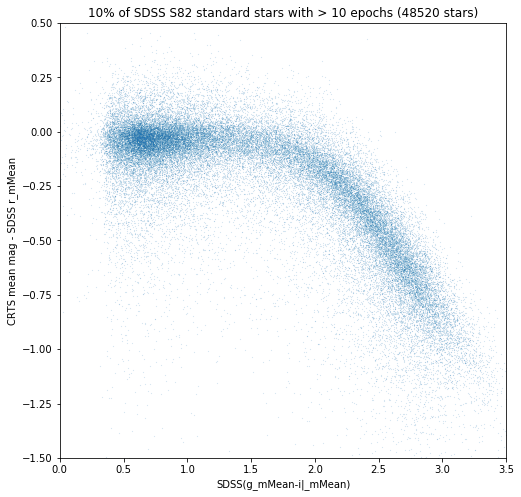

In [5]:
%matplotlib inline
fig,ax  = plt.subplots(1,1,figsize=(8,8))
ax.scatter(g-i, m-r, s=0.004)
ax.set_ylim(-1.5,0.5)
ax.set_xlim(0,3.5)
ax.set_xlabel('SDSS(g_mMean-i|_mMean)')
ax.set_ylabel('CRTS mean mag - SDSS r_mMean')
ax.set_title('10% of SDSS S82 standard stars with > 10 epochs (48520 stars)')
plt.savefig('SDSS_CRTS_S82_standard_stars_g-i_vs_m-r.png')

Store the SDSS ra,dec of the 48250 stars for which we have CRTS light curves from Branimir:

In [6]:
crts_stars[['ra_sdss', 'dec_sdss']].write('sdss_s82_48250_std_stars_radec.txt', 
                                          format='ascii', overwrite='True')

Store also the name , ra, dec , to play with the SDSS SciServer .... 

In [8]:
crts_stars[:10]

raw_mjd_span,raw_mean_mag,raw_mean_err,CRTS_name,raw_lc_length,proc_mean_N_day,proc_mean_err,proc_lc_length,proc_mean_mag,proc_mjd_span,ra_crts,dec_crts,calib_fla,ra_sdss,dec_sdss,raRMS,decRMS,nEpochs,AR_val,u_Nobs,u_mMed,u_mMean,u_mErr,u_rms_scatt,u_chi2,g_Nobs,g_mMed,g_mMean,g_mErr,g_rms_scatt,g_chi2,r_Nobs,r_mMed,r_mMean,r_mErr,r_rms_scatt,r_chi2,i_Nobs,i_mMed,i_mMean,i_mErr,i_rms_scatt,i_chi2,z_Nobs,z_mMed,z_mMean,z_mErr,z_rms_scatt,z_chi2
float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,str10,float64,float64,float64,float64,int64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64
3020.85593,17.8823529412,0.0705147058824,251,136.0,3.4,0.0399875,40.0,17.8839675,3020.8452,0.040063,0.55537,CALIBSTARS,0.040063,0.55537,0.038,0.031,9,0.068,9,19.069,19.062,0.009,0.047,2.0,9,18.253,18.251,0.007,0.016,0.6,9,17.919,17.919,0.006,0.014,0.6,9,17.788,17.79,0.006,0.01,0.2,9,17.731,17.734,0.008,0.02,0.7
2892.13763,15.2544047619,0.05,340,84.0,4.0,0.025,21.0,15.2544047619,2892.1202,0.054511,-1.1499029,CALIBSTARS,0.054511,-1.1499029,0.049,0.067,9,0.097,9,17.772,17.77,0.007,0.018,0.7,9,16.012,16.01,0.006,0.014,0.5,9,15.319,15.318,0.006,0.01,0.3,9,15.056,15.057,0.005,0.013,0.5,9,14.938,14.942,0.006,0.016,0.9
3020.85593,17.8416666667,0.0703623188406,425,138.0,3.45,0.039565,40.0,17.84158,3020.8438,0.073721,0.404988,CALIBSTARS,0.073721,0.404988,0.058,0.057,14,0.071,2,22.361,22.358,0.181,0.127,0.2,13,19.855,19.857,0.007,0.033,1.6,13,18.325,18.322,0.005,0.024,1.0,13,17.166,17.171,0.004,0.016,1.1,13,16.54,16.543,0.005,0.024,1.2
3020.85593,19.4547826087,0.113115942029,455,138.0,3.45,0.0637025,40.0,19.4524925,3020.8438,0.078358,0.235094,CALIBSTARS,0.078358,0.235094,0.032,0.036,13,0.085,0,-0.33,-0.33,0.0,0.0,0.0,12,20.936,20.937,0.011,0.03,0.5,12,19.601,19.602,0.007,0.033,1.8,12,18.961,18.971,0.006,0.023,1.6,12,18.615,18.601,0.013,0.066,2.1
3020.85593,14.7506521739,0.05,522,138.0,3.45,0.028005,40.0,14.75144,3020.8438,0.093134,0.751608,CALIBSTARS,0.093134,0.751608,0.032,0.021,5,0.077,5,16.393,16.385,0.007,0.028,1.8,5,15.192,15.192,0.006,0.005,0.1,5,14.798,14.808,0.008,0.03,2.8,5,14.667,14.666,0.008,0.023,0.9,5,14.647,14.645,0.009,0.006,0.1
2889.07825,19.1402702703,0.102094594595,552,148.0,4.0,0.050972972973,37.0,19.1382324324,2889.0603,0.100371,1.1440089,CALIBSTARS,0.100371,1.1440089,0.044,0.034,13,0.08,10,22.084,22.054,0.08,0.251,1.1,12,20.204,20.197,0.009,0.042,2.0,12,19.206,19.204,0.006,0.023,1.1,12,18.782,18.779,0.006,0.026,1.5,12,18.541,18.537,0.011,0.041,1.0
3020.85593,20.9057037037,0.214814814815,553,135.0,3.46153846154,0.119005128205,39.0,20.8606025641,3020.8438,0.100521,0.309938,CALIBSTARS,0.100521,0.309938,0.08,0.055,12,0.078,0,-0.36,-0.36,0.0,0.0,0.0,11,22.595,22.573,0.038,0.092,0.5,11,21.211,21.209,0.017,0.07,1.3,11,20.296,20.291,0.012,0.037,0.9,11,19.736,19.755,0.031,0.113,1.2
2889.07825,17.9585810811,0.0721621621622,607,148.0,4.0,0.0360594594595,37.0,17.958272973,2889.0603,0.110501,1.2332392,CALIBSTARS,0.110501,1.2332392,0.049,0.035,13,0.075,12,19.65,19.645,0.012,0.045,1.0,12,18.431,18.429,0.006,0.018,0.7,12,17.956,17.956,0.005,0.019,0.9,12,17.796,17.796,0.005,0.014,0.7,12,17.74,17.733,0.008,0.03,1.2
3020.85593,17.2116666667,0.0626811594203,636,138.0,3.45,0.0349925,40.0,17.2124025,3020.8438,0.115436,0.686838,CALIBSTARS,0.115436,0.686838,0.038,0.048,13,0.078,12,21.657,21.618,0.044,0.194,1.0,12,19.21,19.212,0.006,0.023,0.8,12,17.821,17.821,0.006,0.015,0.5,12,16.561,16.562,0.004,0.015,0.8,12,15.879,15.878,0.005,0.016,0.7


In [9]:
crts_stars[['CRTS_name','ra_sdss', 'dec_sdss']].write('sdss_s82_48250_std_stars_name_radec.txt', 
                                          format='ascii', overwrite='True')

I used these ra,dec  to query the PS1 via casjobs in MAST : https://confluence.stsci.edu/display/PANSTARRS/Pan-STARRS1+data+archive+home+page
        
        http://mastweb.stsci.edu/ps1casjobs/ 

Note : the PS1 QSO are in 'grizy', which may be the same as SDSS : test that 
        by plotting the magnitude differences... The QSO light curves are in 'grizy', so are the standard stars . 

In [21]:
# results of PS1 query ...

ps1_stars = Table.read('../raw_data/PS1_stars_s82.csv', format='ascii')

In [37]:
np.sum(np.in1d(crts_stars['ra_sdss'], ps1_stars['ra']))

48247

In [40]:
#np.unique(crts_stars['ra_sdss'])

In [50]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import  hstack

# Use only those to match to SDSS : 
ps1_clean = ps1_stars[ps1_stars['nDetections'] > 5]

sdss_coord = SkyCoord(ra=crts_stars['ra_sdss']*u.degree, 
                      dec=crts_stars['dec_sdss']*u.degree)
ps1_coord = SkyCoord(ra=ps1_clean['raMean']*u.degree, 
                      dec=ps1_clean['decMean']*u.degree)
idx, sep2d, dist3d = sdss_coord.match_to_catalog_sky(ps1_coord)


sdss_ps1 = hstack([crts_stars, ps1_clean[idx]])


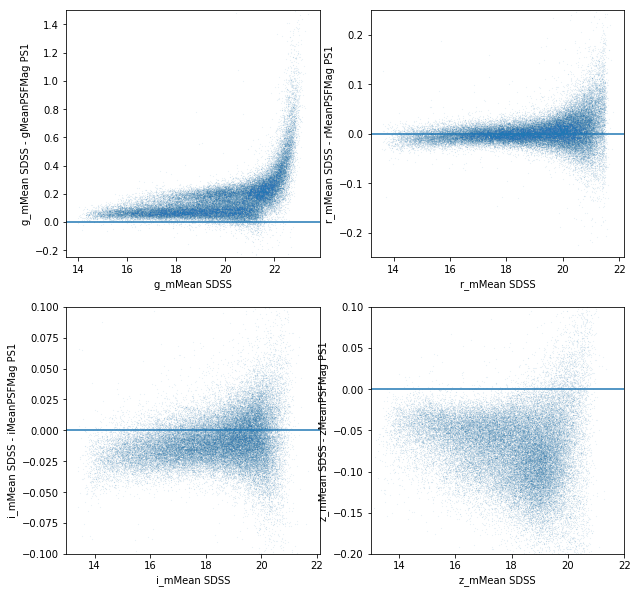

In [68]:
# Find the duplicate matches....
# np.unique(ps1_stars['ra'])
filters = ['g','r','i','z']


fig,axs= plt.subplots(2,2, figsize=(10,10))
ax = np.ravel(axs)
for i in range(len(ax)):
    f = filters[i]
    dmag = sdss_ps1[f+'_mMean'] - sdss_ps1[f+'MeanPSFMag']
    ax[i].scatter(sdss_ps1[f+'_mMean'], dmag, s=0.001)
    
    ax[i].set_xlabel(f + '_mMean SDSS')
    ax[i].set_ylabel(f+'_mMean SDSS - '+f+'MeanPSFMag PS1')
    ax[i].axhline(0)
    
ax[0].set_ylim(-0.25,1.5) 
ax[1].set_ylim(-0.25, 0.25)
ax[2].set_ylim(-0.1, 0.1)
ax[3].set_ylim(-0.2, 0.1)
ax[3].set_xlim(13,22)
fig.subplots_adjust(hspace=0.2, wspace=0.2)


In [60]:
#sdss_ps1

raw_mjd_span,raw_mean_mag,raw_mean_err,CRTS_name,raw_lc_length,proc_mean_N_day,proc_mean_err,proc_lc_length,proc_mean_mag,proc_mjd_span,ra_crts,dec_crts,calib_fla,ra_sdss,dec_sdss,raRMS,decRMS,nEpochs,AR_val,u_Nobs,u_mMed,u_mMean,u_mErr,u_rms_scatt,u_chi2,g_Nobs,g_mMed,g_mMean,g_mErr,g_rms_scatt,g_chi2,r_Nobs,r_mMed,r_mMean,r_mErr,r_rms_scatt,r_chi2,i_Nobs,i_mMed,i_mMean,i_mErr,i_rms_scatt,i_chi2,z_Nobs,z_mMed,z_mMean,z_mErr,z_rms_scatt,z_chi2,ra,dec,objID,raMean,decMean,nDetections,ng,nr,ni,nz,ny,gMeanPSFMag,rMeanPSFMag,iMeanPSFMag,zMeanPSFMag,yMeanPSFMag
float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,str10,float64,float64,float64,float64,int64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64
3020.85593,17.8823529412,0.0705147058824,251,136.0,3.4,0.0399875,40.0,17.8839675,3020.8452,0.040063,0.55537,CALIBSTARS,0.040063,0.55537,0.038,0.031,9,0.068,9,19.069,19.062,0.009,0.047,2.0,9,18.253,18.251,0.007,0.016,0.6,9,17.919,17.919,0.006,0.014,0.6,9,17.788,17.79,0.006,0.01,0.2,9,17.731,17.734,0.008,0.02,0.7,0.040063,0.55537,108660000401136802,0.04012087,0.55527302,79,12,20,24,11,12,18.2329998016,17.9456996918,17.8281002045,17.798500061,17.7858009338
2892.13763,15.2544047619,0.05,340,84.0,4.0,0.025,21.0,15.2544047619,2892.1202,0.054511,-1.1499029,CALIBSTARS,0.054511,-1.1499029,0.049,0.067,9,0.097,9,17.772,17.77,0.007,0.018,0.7,9,16.012,16.01,0.006,0.014,0.5,9,15.319,15.318,0.006,0.01,0.3,9,15.056,15.057,0.005,0.013,0.5,9,14.938,14.942,0.006,0.016,0.9,0.054511,-1.1499029,106620000545480580,0.05450671,-1.14991365,91,12,26,29,10,14,15.8919000626,15.2995004654,15.0699996948,14.9767999649,14.882900238
3020.85593,17.8416666667,0.0703623188406,425,138.0,3.45,0.039565,40.0,17.84158,3020.8438,0.073721,0.404988,CALIBSTARS,0.073721,0.404988,0.058,0.057,14,0.071,2,22.361,22.358,0.181,0.127,0.2,13,19.855,19.857,0.007,0.033,1.6,13,18.325,18.322,0.005,0.024,1.0,13,17.166,17.171,0.004,0.016,1.1,13,16.54,16.543,0.005,0.024,1.2,0.073721,0.404988,108480000736626486,0.07361949,0.40507637,69,12,14,23,10,10,19.6247005463,18.3346996307,17.1863994598,16.6585006714,16.396900177
3020.85593,19.4547826087,0.113115942029,455,138.0,3.45,0.0637025,40.0,19.4524925,3020.8438,0.078358,0.235094,CALIBSTARS,0.078358,0.235094,0.032,0.036,13,0.085,0,-0.33,-0.33,0.0,0.0,0.0,12,20.936,20.937,0.011,0.03,0.5,12,19.601,19.602,0.007,0.033,1.8,12,18.961,18.971,0.006,0.023,1.6,12,18.615,18.601,0.013,0.066,2.1,0.078358,0.235094,108280000783302529,0.07834744,0.23504445,82,10,22,25,12,13,20.7171001434,19.6212997437,18.9897003174,18.7287006378,18.5344009399
3020.85593,14.7506521739,0.05,522,138.0,3.45,0.028005,40.0,14.75144,3020.8438,0.093134,0.751608,CALIBSTARS,0.093134,0.751608,0.032,0.021,5,0.077,5,16.393,16.385,0.007,0.028,1.8,5,15.192,15.192,0.006,0.005,0.1,5,14.798,14.808,0.008,0.03,2.8,5,14.667,14.666,0.008,0.023,0.9,5,14.647,14.645,0.009,0.006,0.1,0.093134,0.751608,108900000931322354,0.0931247,0.75158327,81,10,28,19,9,15,15.163599968,14.8111000061,14.7030000687,14.6808996201,14.6504001617
2889.07825,19.1402702703,0.102094594595,552,148.0,4.0,0.050972972973,37.0,19.1382324324,2889.0603,0.100371,1.1440089,CALIBSTARS,0.100371,1.1440089,0.044,0.034,13,0.08,10,22.084,22.054,0.08,0.251,1.1,12,20.204,20.197,0.009,0.042,2.0,12,19.206,19.204,0.006,0.023,1.1,12,18.782,18.779,0.006,0.026,1.5,12,18.541,18.537,0.011,0.041,1.0,0.100371,1.1440089,109370001003733209,0.10037719,1.14390159,78,9,28,21,8,12,20.0734004974,19.2198009491,18.790599823,18.6217002869,18.4771003723
3020.85593,20.9057037037,0.214814814815,553,135.0,3.46153846154,0.119005128205,39.0,20.8606025641,3020.8438,0.100521,0.309938,CALIBSTARS,0.100521,0.309938,0.08,0.055,12,0.078,0,-0.3

In [33]:
# Mask the missing data...
mg = ps1_stars['gMeanPSFMag'] > 0
mr = ps1_stars['gMeanPSFMag'] > 0
mi = ps1_stars['gMeanPSFMag'] > 0
m = mr*mi*mg

(-0.6, 2)

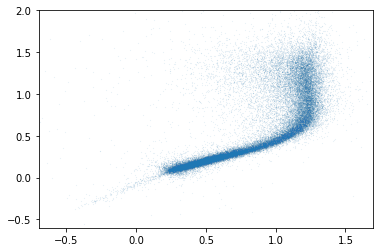

In [34]:
plt.scatter(ps1_stars['gMeanPSFMag'][m]-ps1_stars['rMeanPSFMag'][m], 
ps1_stars['rMeanPSFMag'][m]-ps1_stars['iMeanPSFMag'][m], s=0.001)
plt.xlim(-0.7,1.7)
plt.ylim(-0.6,2)

ValueError: operands could not be broadcast together with shapes (57912,) (48250,) 

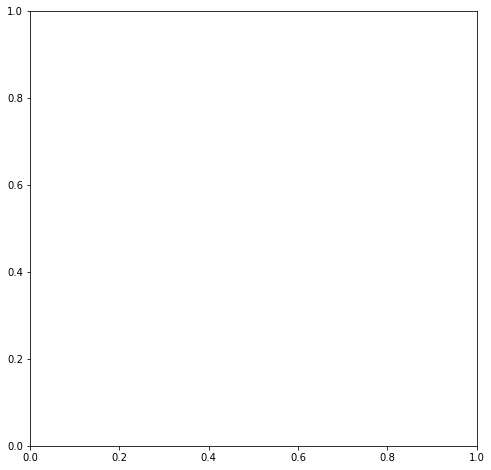

In [24]:
ps1_stars

%matplotlib inline
fig,ax  = plt.subplots(1,1,figsize=(8,8))
ax.scatter(g-i, ps1_stars['gMeanPSFMag']-r, s=0.004)
ax.set_ylim(-1.5,0.5)
ax.set_xlim(0,3.5)
ax.set_xlabel('SDSS(g_mMean-i|_mMean)')
ax.set_ylabel('CRTS mean mag - SDSS r_mMean')
ax.set_title('10% of SDSS S82 standard stars with > 10 epochs (48520 stars)')
plt.savefig('SDSS_CRTS_S82_standard_stars_g-i_vs_m-r.png')

In [ ]:
Zeljko initially suggested over e-mail on 10/26/2017 to use what he did in Ivezic+2007, http://faculty.washington.edu/ivezic/Publications/Ivezic07.pdf,  but then during the meeting on 10/27/2017,  we decided to use the already published PS1 - SDSS transformations by Tonry+2012 :  http://iopscience.iop.org/article/10.1088/0004-637X/750/2/99/pdf  